## **LIBRARY IMPORTS**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

## **DATASET LOADING**

In [ ]:
sns.set()
start_time = datetime.now()

data = pd.read_csv('/content/gdrive/MyDrive/Deep Learning/smart_grid_stability_augmented.csv')

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

In [ ]:
data.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
42431,8.900119,7.876935,1.764573,9.129238,3.736853,-1.142684,-0.893881,-1.700288,0.449083,0.414179,0.590476,0.203536,-0.000859,1
22591,0.868450,2.247679,6.672914,2.151579,5.212489,-1.523799,-1.700112,-1.988578,0.972335,0.976502,0.935567,0.667724,0.001012,0
9021,5.613581,2.108271,7.357155,1.641840,4.363836,-1.610726,-1.777801,-0.975309,0.218918,0.238499,0.354730,0.226180,-0.042331,1
1227,5.517582,8.957591,1.436065,6.313365,4.291516,-1.722768,-1.345658,-1.223091,0.684754,0.566761,0.496002,0.444886,0.026825,0
45308,1.568167,1.952352,0.923446,8.001853,2.744477,-1.081480,-0.887939,-0.775058,0.236835,0.297849,0.108624,0.123135,-0.045715,1
27009,2.174917,6.249662,5.926873,7.813162,4.556261,-1.436696,-1.796187,-1.323378,0.786453,0.567551,0.082009,0.483546,0.005247,0
59670,4.714108,2.966144,6.485419,6.519090,3.809945,-1.326845,-0.983262,-1.499838,0.613124,0.132333,0.706446,0.586079,0.049834,0
2156,2.345154,4.380992,8.363746,8.451936,3.003175,-1.056524,-1.190105,-0.756547,0.684860,0.290270,0.859949,0.633951,0.040909,0
29592,1.071260,7.304838,7.494131,2.292079,3.348502,-1.086265,-0.513176,-1.749061,0.580907,0.699903,0.984090,0.678578,0.030855,0
30403,2.045967,2.766099,5.076072,5.359656,4.864915,-1.917315,-1.987615,-0.959986,0.874374,0.796852,0.308609,0.133127,-0.010599,1


### **EXPLORATORY DATA ANALYSIS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 42431 to 57334
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.9 MB


In [ ]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760,0.000000
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557,0.000000
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142,0.000000
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403,1.000000


In [ ]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).
    
    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.
    
    Keyword arguments:
    
    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()

    
def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.
    
    Keyword arguments:
    
    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                    center=0, annot=True, annot_kws={"size": 8}, cmap="PRGn")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


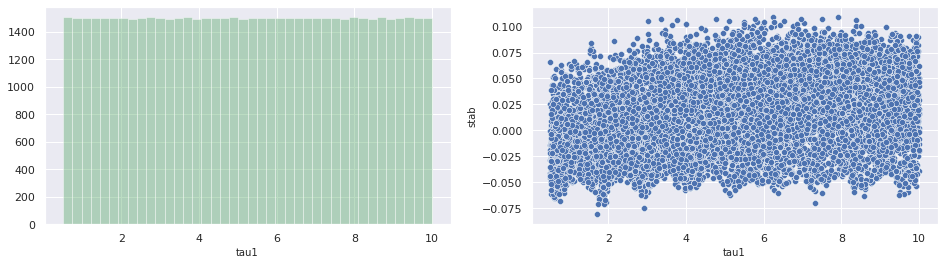

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


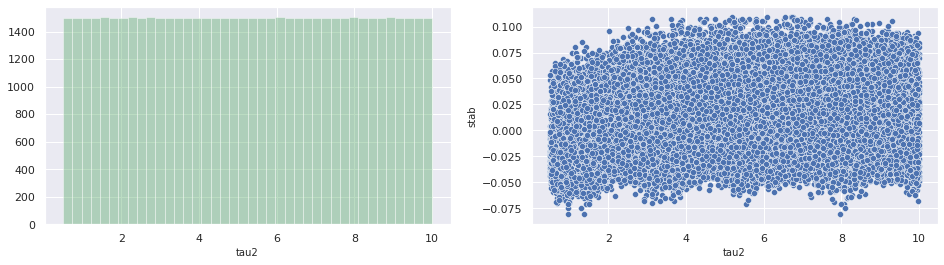

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


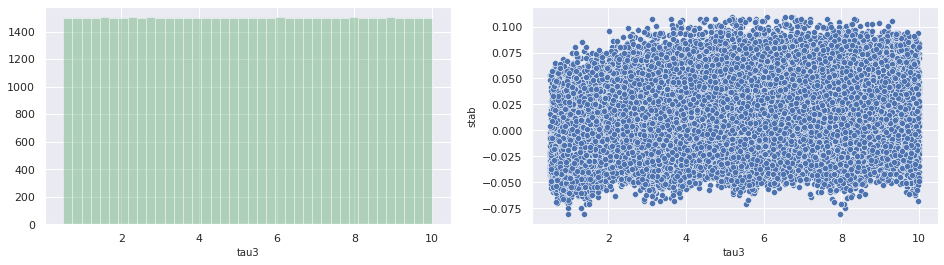

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


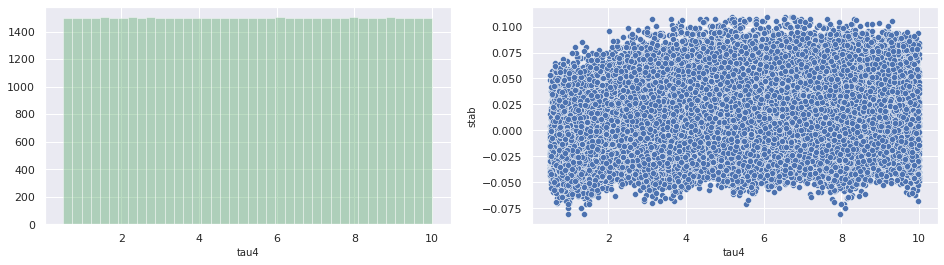

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


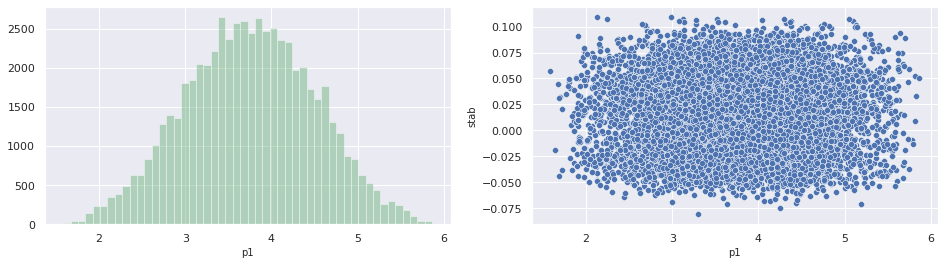

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


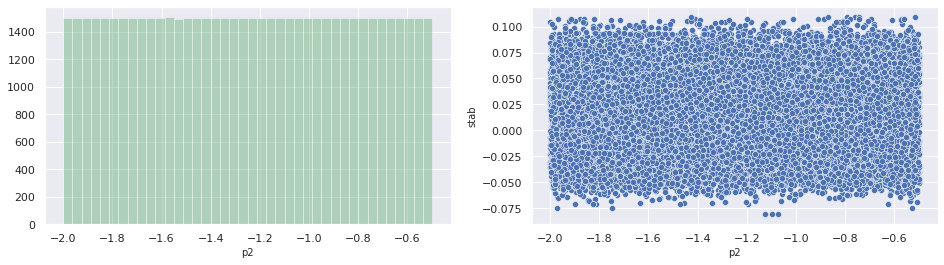

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


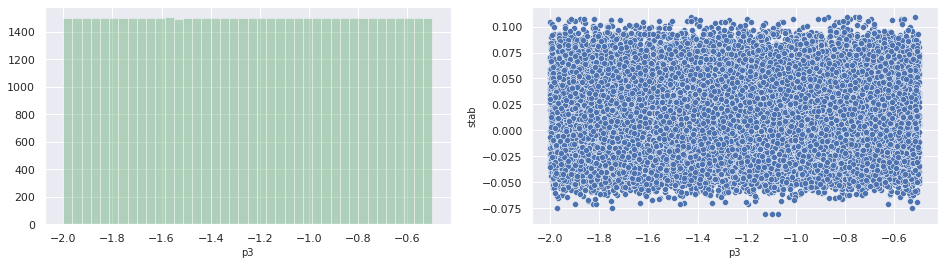

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


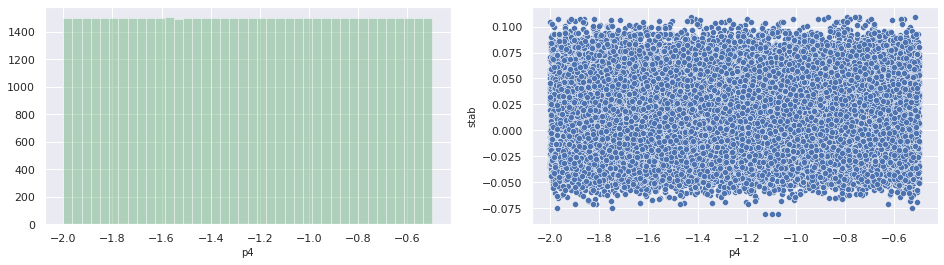

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


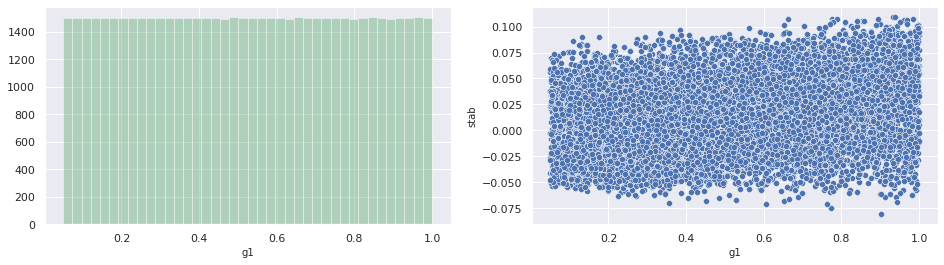

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


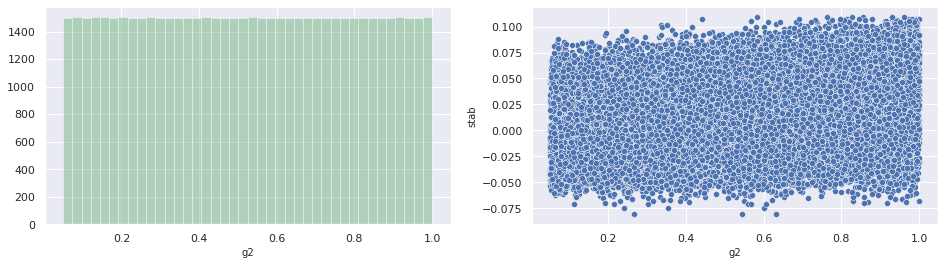

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


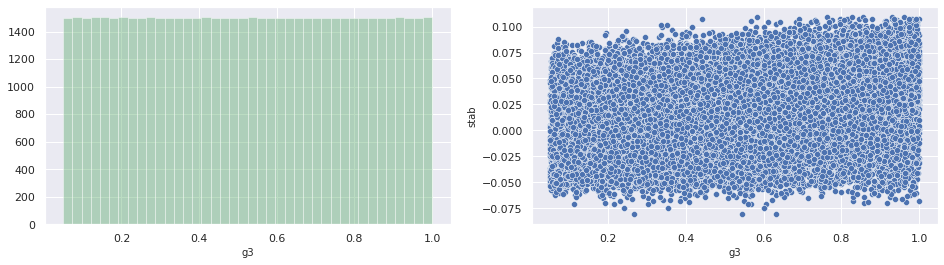

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


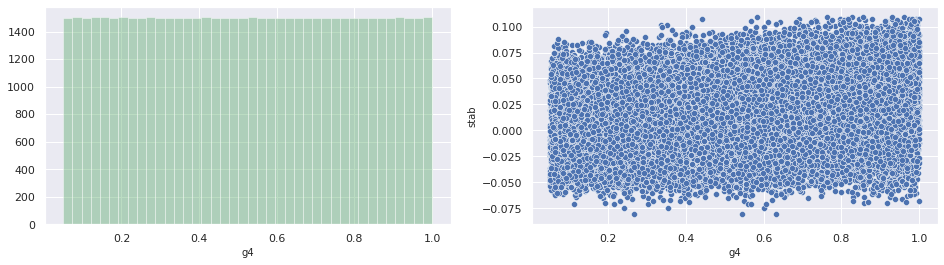

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


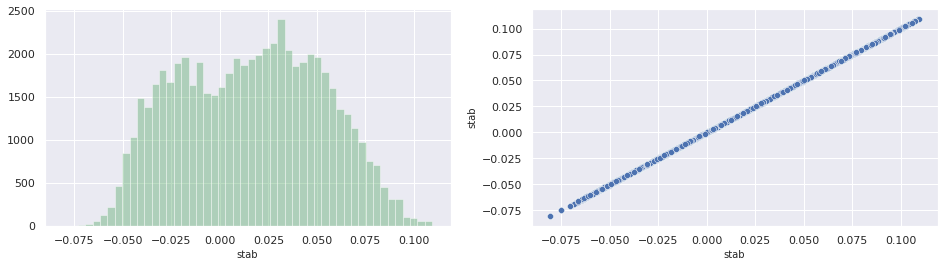

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


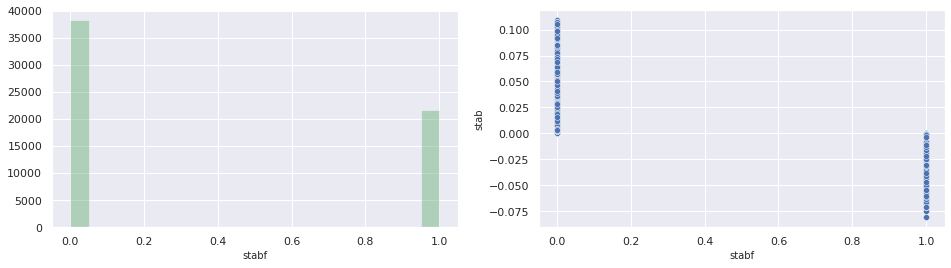

In [ ]:
for column in data.columns:
    assessment(data, 'stab', column, -1)

In [ ]:
data.p1.skew()

-0.012688423269883422

In [ ]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset:')
print(data['stabf'].value_counts(normalize=True))

Split of "unstable" (0) and "stable" (1) observations in the original dataset:
0    0.638
1    0.362
Name: stabf, dtype: float64


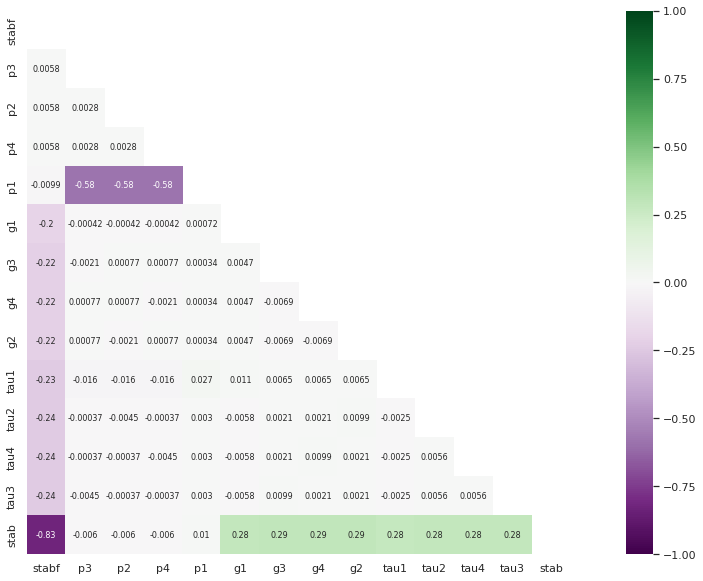

In [ ]:
correlation_map(data, 'stabf', 14)

In [ ]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:54000, :]
y_training = y.iloc[:54000]

X_testing = X.iloc[54000:, :]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing

(0    0.637889
 1    0.362111
 Name: stabf, dtype: float64, 0    0.639
 1    0.361
 Name: stabf, dtype: float64)

In [ ]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

In [ ]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

# Present Model

Epochs: 10

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=10, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.1238 - accuracy: 0.9465
Round 1 - Loss: 0.1238 | Accuracy: 94.65 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9594
Round 2 - Loss: 0.0956 | Accuracy: 95.94 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9669
Round 3 - Loss: 0.0826 | Accuracy: 96.69 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9643
Round 4 - Loss: 0.0810 | Accuracy: 96.43 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9681
Round 5 - Loss: 0.0737 | Accuracy: 96.81 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9696
Round 6 - Loss: 0.0748 | Accuracy: 96.96 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9707
Round 7 - Loss: 0.0744 | Accuracy: 97.07 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3769,65
Actual Stable,100,2066


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.25%


Epochs: 20

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=20, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9563
Round 1 - Loss: 0.1068 | Accuracy: 95.63 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9678
Round 2 - Loss: 0.0761 | Accuracy: 96.78 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9670
Round 3 - Loss: 0.0756 | Accuracy: 96.70 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9648
Round 4 - Loss: 0.0824 | Accuracy: 96.48 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9730
Round 5 - Loss: 0.0605 | Accuracy: 97.30 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9772
Round 6 - Loss: 0.0545 | Accuracy: 97.72 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9774
Round 7 - Loss: 0.0568 | Accuracy: 97.74 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3772,62
Actual Stable,88,2078


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.50%


Epochs: 50

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9706
Round 1 - Loss: 0.0754 | Accuracy: 97.06 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9757
Round 2 - Loss: 0.0580 | Accuracy: 97.57 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9778
Round 3 - Loss: 0.0522 | Accuracy: 97.78 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9796
Round 4 - Loss: 0.0525 | Accuracy: 97.96 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9819
Round 5 - Loss: 0.0457 | Accuracy: 98.19 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9831
Round 6 - Loss: 0.0425 | Accuracy: 98.31 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9846
Round 7 - Loss: 0.0402 | Accuracy: 98.46 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3800,34
Actual Stable,102,2064


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.73%


# New Model

Epochs = 10

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=10, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.1328 - accuracy: 0.9415
Round 1 - Loss: 0.1328 | Accuracy: 94.15 %
169/169 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9541
Round 2 - Loss: 0.1054 | Accuracy: 95.41 %
169/169 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9569
Round 3 - Loss: 0.0984 | Accuracy: 95.69 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9606
Round 4 - Loss: 0.0894 | Accuracy: 96.06 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9722
Round 5 - Loss: 0.0712 | Accuracy: 97.22 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9726
Round 6 - Loss: 0.0659 | Accuracy: 97.26 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9744
Round 7 - Loss: 0.0631 | Accuracy: 97.44 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3747,87
Actual Stable,80,2086


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.22%


Epochs = 20

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=20, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9604
Round 1 - Loss: 0.0986 | Accuracy: 96.04 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9670
Round 2 - Loss: 0.0770 | Accuracy: 96.70 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9748
Round 3 - Loss: 0.0610 | Accuracy: 97.48 %
169/169 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9761
Round 4 - Loss: 0.0563 | Accuracy: 97.61 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9813
Round 5 - Loss: 0.0497 | Accuracy: 98.13 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9785
Round 6 - Loss: 0.0496 | Accuracy: 97.85 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9809
Round 7 - Loss: 0.0467 | Accuracy: 98.09 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3776,58
Actual Stable,91,2075


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.52%


Epochs = 50

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=5).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9706
Round 1 - Loss: 0.0716 | Accuracy: 97.06 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9757
Round 2 - Loss: 0.0546 | Accuracy: 97.57 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9809
Round 3 - Loss: 0.0492 | Accuracy: 98.09 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9852
Round 4 - Loss: 0.0371 | Accuracy: 98.52 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9839
Round 5 - Loss: 0.0413 | Accuracy: 98.39 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9856
Round 6 - Loss: 0.0372 | Accuracy: 98.56 %
169/169 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9867
Round 7 - Loss: 0.0376 | Accuracy: 98.67 %
169/169 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3802,32
Actual Stable,96,2070


In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.87%
